CS (Color Score): Represents the color score of the honey sample, ranging from 1.0 to 10.0. Lower values indicate a lighter color, while higher values indicate a darker color.

Density: Represents the density of the honey sample in grams per cubic centimeter at 25°C, ranging from 1.21 to 1.86.

WC (Water Content): Represents the water content in the honey sample, ranging from 12.0% to 25.0%.

pH: Represents the pH level of the honey sample, ranging from 2.50 to 7.50.

EC (Electrical Conductivity): Represents the electrical conductivity of the honey sample in milliSiemens per centimeter.

F (Fructose Level): Represents the fructose level of the honey sample, ranging from 20 to 50.

G (Glucose Level): Represents the glucose level of the honey sample, ranging from 20 to 45.

Pollen_analysis: Represents the floral source of the honey sample. Possible values include Clover, Wildflower, Orange Blossom, Alfalfa, Acacia, Lavender, Eucalyptus, Buckwheat, Manuka, Sage, Sunflower, Borage, Rosemary, Thyme, Heather, Tupelo, Blueberry, Chestnut, and Avocado.

Viscosity: Represents the viscosity of the honey sample in centipoise, ranging from 1500 to 10000. Viscosity values between 2500 and 9500 are considered optimal for purity.

Purity: The target variable represents the purity of the honey sample, ranging from 0.01 to 1.00.

Price: The calculated price of the honey. '''

In [33]:
#Imports
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation,Dropout
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
#our honey data
data = pd.read_csv('/content/honey_purity_dataset.csv')
data.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247903 entries, 0 to 247902
Data columns (total 11 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   CS               247903 non-null  float64
 1   Density          247903 non-null  float64
 2   WC               247903 non-null  float64
 3   pH               247903 non-null  float64
 4   EC               247903 non-null  float64
 5   F                247903 non-null  float64
 6   G                247903 non-null  float64
 7   Pollen_analysis  247903 non-null  object 
 8   Viscosity        247903 non-null  float64
 9   Purity           247903 non-null  float64
 10  Price            247903 non-null  float64
dtypes: float64(10), object(1)
memory usage: 20.8+ MB


In [4]:
data.describe()

,CS,Density,WC,pH,EC,F,G,Viscosity,Purity,Price
count,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000,247903.000000
mean,5.500259,1.535523,18.502625,4.996047,0.799974,34.970573,32.501006,5752.893888,0.824471,594.807644
std,2.593947,0.187824,3.748635,1.444060,0.057911,8.655898,7.226290,2455.739903,0.139417,233.627972
min,1.000000,1.210000,12.000000,2.500000,0.700000,20.000000,20.000000,1500.050000,0.610000,128.720000
25%,3.260000,1.370000,15.260000,3.750000,0.750000,27.460000,26.230000,3627.880000,0.660000,433.000000
50%,5.500000,1.540000,18.510000,4.990000,0.800000,34.970000,32.490000,5753.770000,0.820000,612.960000
75%,7.740000,1.700000,21.750000,6.250000,0.850000,42.470000,38.760000,7886.650000,0.970000,770.220000
max,10.000000,1.860000,25.000000,7.500000,0.900000,50.000000,45.000000,9999.970000,1.000000,976.690000


In [6]:
data['Pollen_analysis'].describe()

count         247903
unique            19
top       Eucalyptus
freq           13194
Name: Pollen_analysis, dtype: object

Exploratory Data Analysis

In [7]:
#Check for missing data
data.isna().sum()

CS                 0
Density            0
WC                 0
pH                 0
EC                 0
F                  0
G                  0
Pollen_analysis    0
Viscosity          0
Purity             0
Price              0
dtype: int64

<Axes: >

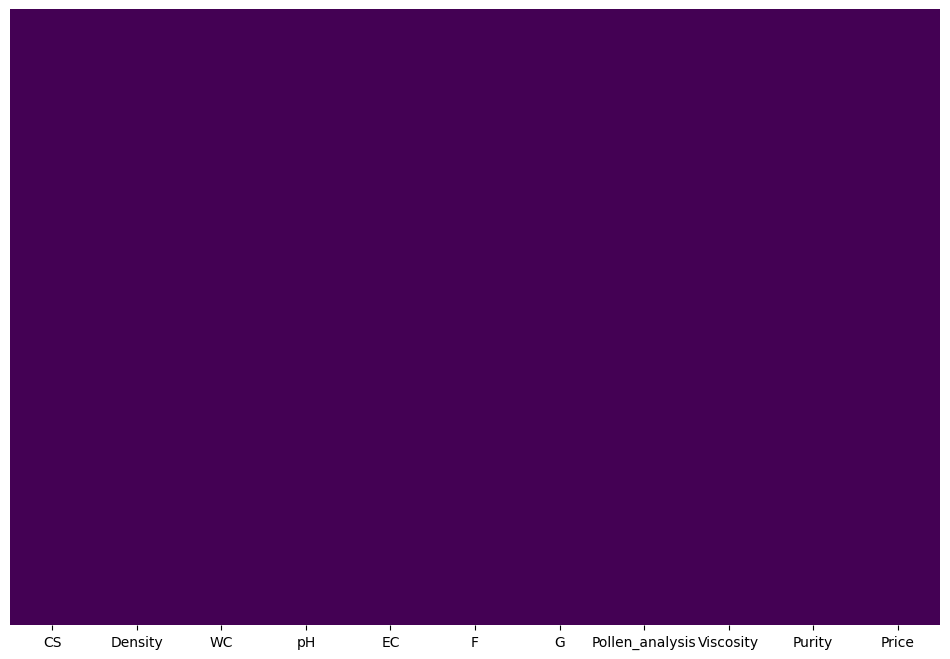

In [9]:
#visual check for missing data
plt.figure(figsize=(12,8))
sns.heatmap(data.isna(),yticklabels=False,cbar=False,cmap='viridis')

In [10]:
#our target column
data.Purity.value_counts()

1.00    52850
0.66    40252
0.82    27040
0.64    24386
0.80    16548
0.68    13825
0.97    13430
0.84    10125
0.95     6908
0.90     6329
0.99     5173
0.87     4408
0.61     3962
0.88     3877
0.92     3633
0.94     2924
0.85     2738
0.77     2698
0.63     2022
0.89     1613
0.79     1377
0.96     1151
0.86      346
0.98      288
Name: Purity, dtype: int64

In [17]:
data.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


Preprocessing

In [18]:
data.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,Blueberry,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,Alfalfa,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,Chestnut,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,Blueberry,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,Alfalfa,5125.44,1.00,432.62


In [19]:
data['Pollen_analysis'].value_counts()

Eucalyptus        13194
Avocado           13191
Heather           13187
Thyme             13156
Sunflower         13148
Sage              13117
Blueberry         13106
Lavender          13086
Alfalfa           13049
Buckwheat         13036
Chestnut          13020
Wildflower        13016
Manuka            13003
Borage            13000
Orange Blossom    12992
Acacia            12976
Rosemary          12930
Clover            12910
Tupelo            12786
Name: Pollen_analysis, dtype: int64

In [20]:
data['Pollen_analysis'].unique()

array(['Blueberry', 'Alfalfa', 'Chestnut', 'Borage', 'Sunflower',
       'Orange Blossom', 'Acacia', 'Tupelo', 'Clover', 'Wildflower',
       'Thyme', 'Sage', 'Avocado', 'Lavender', 'Eucalyptus', 'Buckwheat',
       'Rosemary', 'Heather', 'Manuka'], dtype=object)

In [22]:
#Replacing the pollen_analysis column with numerical values
data.replace({'Pollen_analysis' : {'Blueberry': 0, 'Alfalfa': 1, 'Chestnut': 2, 'Borage': 3, 'Sunflower': 4,
       'Orange Blossom' : 5, 'Acacia' : 6, 'Tupelo' : 7, 'Clover' : 8, 'Wildflower' : 9,
       'Thyme' : 10, 'Sage' : 11, 'Avocado' : 12, 'Lavender' : 13, 'Eucalyptus' : 14, 'Buckwheat' : 15,
       'Rosemary' : 16, 'Heather' : 17, 'Manuka' : 18}},inplace=True)
data.head()

,CS,Density,WC,pH,EC,F,G,Pollen_analysis,Viscosity,Purity,Price
0,2.81,1.75,23.04,6.29,0.76,39.02,33.63,0,4844.50,0.68,645.24
1,9.47,1.82,17.50,7.20,0.71,38.15,34.41,1,6689.02,0.89,385.85
2,4.61,1.84,23.72,7.31,0.80,27.47,34.36,2,6883.60,0.66,639.64
3,1.77,1.40,16.61,4.01,0.78,31.52,28.15,0,7167.56,1.00,946.46
4,6.11,1.25,19.63,4.82,0.90,29.65,42.52,1,5125.44,1.00,432.62


In [23]:
#code our feature and target variable
X = data.drop('Purity',axis=1)
y = data['Purity']

print(X.shape,y.shape)

(247903, 10) (247903,)


In [25]:
#Splitting our features and our target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(148741, 10) (99162, 10) (148741,) (99162,)


In [26]:
#Scaling our features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [34]:
#Our Model
model = Sequential()

model.add(Dense(64,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(32,activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(1))

model.compile(loss='mse',optimizer='rmsprop')

In [35]:
#our model training
model.fit(X_train,y_train,epochs=5,batch_size=64,validation_data=(X_test,y_test))

Epoch 1/5
2325/2325 [==============================] - 15s 6ms/step - loss: 0.0218 - val_loss: 0.0056
Epoch 2/5
2325/2325 [==============================] - 14s 6ms/step - loss: 0.0058 - val_loss: 0.0043
Epoch 3/5
2325/2325 [==============================] - 14s 6ms/step - loss: 0.0049 - val_loss: 0.0039
Epoch 4/5
2325/2325 [==============================] - 12s 5ms/step - loss: 0.0044 - val_loss: 0.0031
Epoch 5/5
2325/2325 [==============================] - 7s 3ms/step - loss: 0.0039 - val_loss: 0.0026


<Axes: >

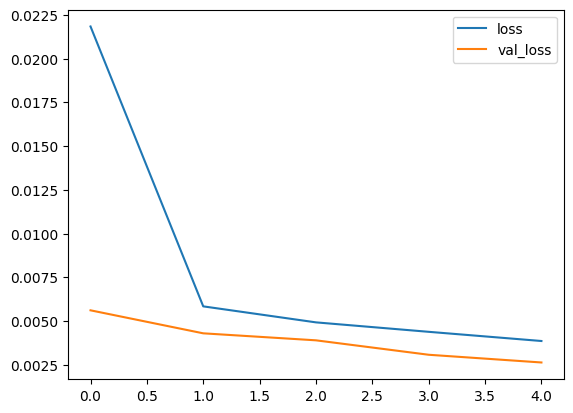

In [36]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [37]:
#Model prediction
honey_prediction = model.predict(X_test)
honey_prediction

3099/3099 [==============================] - 6s 2ms/step


array([[0.7643666 ],
       [0.6491176 ],
       [0.943718  ],
       ...,
       [0.821244  ],
       [0.91281956],
       [0.9772091 ]], dtype=float32)

In [38]:
#Model Evaluation
#mean_squared_error
#mean_absolute_error
print(mean_squared_error(y_test,honey_prediction))
print(mean_absolute_error(y_test,honey_prediction))

0.002633931355738259
0.03557721932798811


In [47]:
#Predicting a random sample in the data
def predict_purity():
  #random sample
  sample = data.sample()
  sample_purity = sample['Purity']
  sample = sample.drop('Purity',axis=1)
  #scaling our data
  sample = scaler.transform(sample)
  #Model Prediction
  pred = model.predict(sample)

  print(f'Our random sample purity is : {sample_purity}')
  print(f'Our Model Prediction of the random sample is : {pred}')

In [48]:
#Running our function to take a random sample and its prediction
predict_purity()

1/1 [==============================] - 0s 40ms/step
Our random sample purity is : 77767    0.68
Name: Purity, dtype: float64
Our Model Prediction of the random sample is : [[0.67658794]]


In [49]:
#Save model
model.save('Honey_Purity.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
